In [2]:

# NN Classfier   O(n*d)  n= <<sample size>> d = <<feature>>
#
# https://www.kaggle.com/jiuzhang/jiuzhang-knn-sk-learn


In [3]:
    
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [4]:
# data is too large, take first train_row rows
def load_data(data_dir, train_row):
    train = pd.read_csv(data_dir + "train.csv")
    print("train data set size:"+str(train.shape))
    x_train = train.values[0:train_row, 1:] #take all rows and their col 1:
    y_train = train.values[0:train_row,0] # label
    
    pred_test = pd.read_csv(data_dir + "test.csv").values
    pred_test = pred_test[:train_row]
    return x_train, y_train, pred_test

train_row= 5000 # in class, we take first 5000. For officaial submission , please take all
data_dir ="./"
origin_x_train, origin_y_train, origin_x_test = load_data(data_dir,train_row)


train data set size:(42000, 785)


In [5]:
print(origin_x_train, origin_y_train, origin_x_test)
print(origin_x_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [1 0 1 ... 8 7 9] [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


8


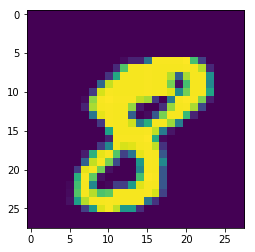

In [6]:
import matplotlib
import matplotlib.pyplot as plt
row = 10
print (origin_y_train[row])

plt.imshow(origin_x_train[row].reshape((28, 28)))
plt.show()



['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


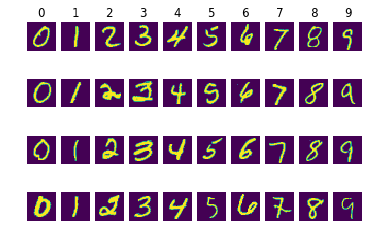

In [7]:
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
rows = 4

print(classes)
for y, cls in enumerate(classes):
    idxs = np.nonzero([i == y for i in origin_y_train])
    idxs = np.random.choice(idxs[0], rows)
    for i , idx in enumerate(idxs):
        plt_idx = i * len(classes) + y + 1
        plt.subplot(rows, len(classes), plt_idx)
        plt.imshow(origin_x_train[idx].reshape((28, 28)))
        plt.axis("off")
        if i == 0:
            plt.title(cls)
        

plt.show()

In [8]:
from sklearn.model_selection import train_test_split

# 80 / 20 

x_train,x_vali, y_train, y_vali = train_test_split(origin_x_train,
                                                   origin_y_train,
                                                   test_size = 0.2,
                                                   random_state = 0)


print(x_train.shape, x_vali.shape, y_train.shape, y_vali.shape)

(4000, 784) (1000, 784) (4000,) (1000,)


In [10]:
import time
import warnings
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
warnings.filterwarnings("ignore", message="numpy.dtype size changed")

ans_k = 0

k_range = range(1, 8)
scores = []

# Find best K
for k in k_range:
    print("k = " + str(k) + " begin ")
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_vali)
    accuracy = accuracy_score(y_vali,y_pred)
    scores.append(accuracy)
    end = time.time()
    print(classification_report(y_vali, y_pred))  
    print(confusion_matrix(y_vali, y_pred))  
    
    print("Complete time: " + str(end-start) + " Secs.")

k = 1 begin 
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       103
          1       0.90      0.98      0.94       100
          2       0.97      0.88      0.92       104
          3       0.89      0.93      0.91       100
          4       0.93      0.93      0.93       107
          5       0.95      0.88      0.92        94
          6       0.93      0.97      0.95        93
          7       0.92      0.94      0.93       116
          8       0.89      0.85      0.87        85
          9       0.85      0.85      0.85        98

avg / total       0.92      0.92      0.92      1000

[[101   0   0   1   0   0   1   0   0   0]
 [  0  98   0   1   0   0   0   0   0   1]
 [  0   1  91   2   2   0   1   2   3   2]
 [  0   0   1  93   0   1   0   1   3   1]
 [  0   0   0   0  99   0   1   0   0   7]
 [  0   2   1   3   0  83   3   0   2   0]
 [  1   1   0   0   0   0  90   0   1   0]
 [  0   4   0   0   1   0   0 109   0   2]
 [  

[0.919, 0.906, 0.92, 0.915, 0.915, 0.914, 0.915]


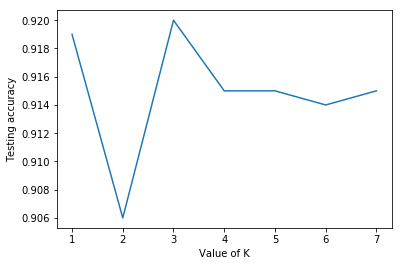

In [11]:
print (scores)
plt.plot(k_range,scores)
plt.xlabel('Value of K')
plt.ylabel('Testing accuracy')
plt.show()

In [13]:

# 測試數據集結果
k = 3

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(origin_x_train,origin_y_train)
y_pred = knn.predict(origin_x_test[:300])
# change this line to y_pred = knn.predict(Origin_X_test) for full test


0


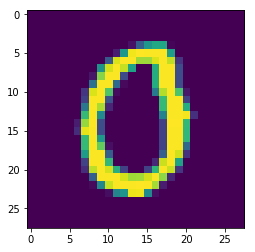

In [16]:

print (y_pred[100])
plt.imshow(origin_x_test[100].reshape((28, 28)))
plt.show()


In [24]:

import os

# 輸出最終結果

print(len(y_pred))

# save submission to csv

outdir = './output'
if not os.path.exists(outdir):
    os.mkdir(outdir)

pd.DataFrame({"ImageId": list(range(1,len(y_pred)+1)),
              "Label": y_pred}) \
.to_csv(outdir+'/Digit_Recogniser_Result.csv', index=False,header=True)



300
